<a href="https://colab.research.google.com/github/hollai465/FinalProject/blob/main/prototypeVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving countryPercentage.csv to countryPercentage.csv
Saving MOCK_DATA_GAME.csv to MOCK_DATA_GAME.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
referenceDataset = pd.read_csv('mockCountryPercentage.csv')
individualDataset = pd.read_csv('mockGameData.csv')


referenceDataset.columns = referenceDataset.columns.str.lower()
individualDataset.columns = individualDataset.columns.str.lower()

individualDataset = individualDataset.rename(columns={'is concerned about enviornment': 'concerned'})


In [ ]:
actual_pct = individualDataset.groupby('country')['concerned'].mean().reset_index()
actual_pct['actual_pct'] = actual_pct['concerned']
actual_pct = actual_pct.drop(columns=['concerned'])

comparison = pd.merge(referenceDataset[['country', 'percantage']], actual_pct, on='country')

comparison.head()

,country,percantage,actual_pct
0,USA,0.54,0.446809
1,Vietnam,0.62,0.513514
2,Phillipines,0.66,0.342105
3,UK,0.47,0.470588
4,Austrailia,0.51,0.500000


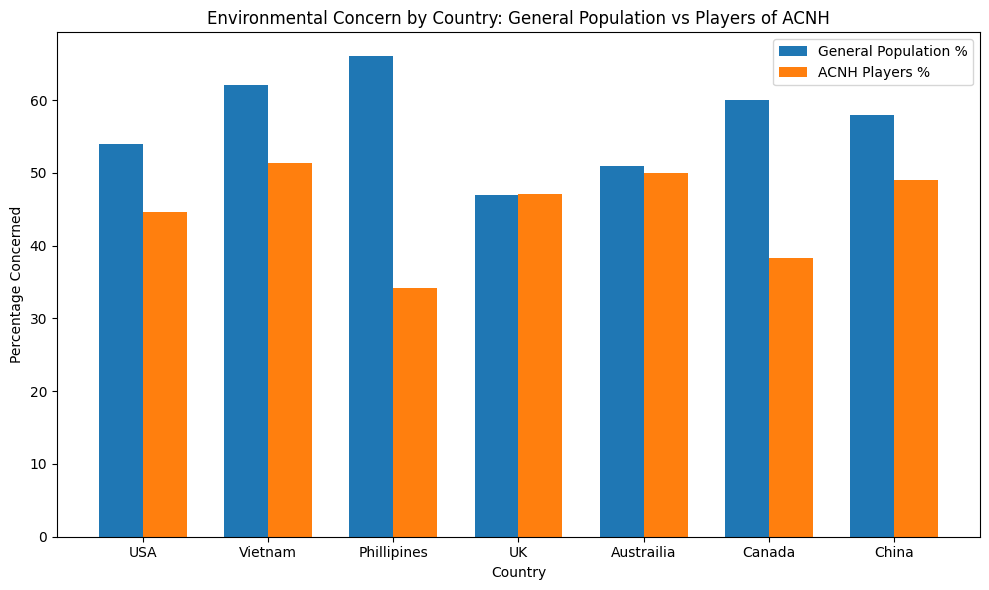

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(comparison))

plt.bar(x, comparison['percantage']*100, width=bar_width, label='General Population %', color='#1f77b4')
plt.bar([i + bar_width for i in x], comparison['actual_pct']*100, width=bar_width, label='ACNH Players %', color='#ff7f0e')

plt.xlabel('Country')
plt.ylabel('Percentage Concerned')
plt.title('Environmental Concern by Country: General Population vs Players of ACNH')
plt.xticks([i + bar_width/2 for i in x], comparison['country'])
plt.legend()
plt.tight_layout()
plt.show()